### Understanding Embeddings

Embeddings are a way to represent text in a numerical format, typically as dense vectors in a high-dimensional space. They capture the semantic meaning of the text, allowing similar texts to have similar representations. This makes it easier to compare and analyze textual data.

#### How Embeddings Work

Embeddings are created using various techniques, such as Word2Vec, GloVe, FastText, or transformer-based models like BERT. These techniques map words or sentences to vectors in such a way that semantically similar items are close to each other in the vector space.

#### Example: Creating Embeddings with BERT

To create embeddings with BERT, we use the `transformers` library to process and encode sample sentences. BERT provides rich contextual embeddings by taking into account the entire sentence structure.

c:\Users\Javier\Documents\GitHub\machine_learning_studies\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Javier\Documents\GitHub\machine_learning_studies\myenv\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Javier\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run P

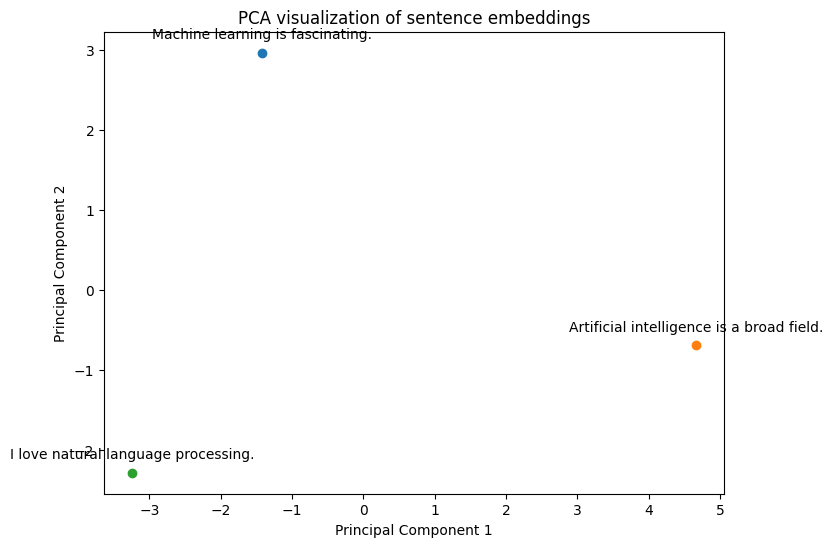

Embeddings shape: torch.Size([3, 768])


In [1]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Sample sentences
sentences = [
    "Machine learning is fascinating.",
    "Artificial intelligence is a broad field.",
    "I love natural language processing."
]

# Tokenize sentences and get embeddings
inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
with torch.no_grad():
    outputs = model(**inputs)

# Extract the embeddings
embeddings = outputs.last_hidden_state.mean(dim=1)

# Perform PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings.numpy())

# Plot the 2D embeddings
plt.figure(figsize=(8, 6))
for i, label in enumerate(sentences):
    x, y = embeddings_2d[i, :]
    plt.scatter(x, y)
    plt.annotate(label, (x, y), textcoords='offset points', xytext=(0, 10), ha='center')
plt.title("PCA visualization of sentence embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("Embeddings shape:", embeddings.shape)


### Interpretation of the PCA Plot

The PCA plot visualizes high-dimensional embeddings in 2D space. Each point represents a sentence reduced to two principal components.

- **Semantic Clustering**: Similar sentences are closer together. For instance, sentences with similar meanings will have nearby points.
- **Principal Components**: The axes represent directions capturing the most variance, highlighting the most significant differences between sentences.
- **Distance Interpretation**: Distances between points indicate similarity. Smaller distances suggest higher similarity, while larger distances suggest greater dissimilarity.

In the plot:
- "Machine learning is fascinating." and "Artificial intelligence is a broad field." are farther apart, indicating less similarity.
- "I love natural language processing." is closer to "Machine learning is fascinating.", suggesting semantic similarity.

This plot helps visualize relationships between sentences based on their embeddings, making the semantic structure easier to understand.

### Conclusion

Embeddings represent textual data in numerical format, capturing semantic relationships. Using models like BERT, we create rich embeddings for tasks such as similarity measurement and retrieval-augmented generation. Visualizing embeddings with PCA reveals insights into text relationships and embedding space structure.

### Next steps

Now that we learned what is an embedding made by BERT model, we are going to apply the concect of embeddings together with generative ai, with the next steps we are going to learn how to apply an RAG solution with langchain.


In [2]:
from dotenv import load_dotenv
load_dotenv('.env', override=True)

False

In [3]:
from langchain_openai import OpenAIEmbeddings

# Initialize the embeddings model
embeddings_model = OpenAIEmbeddings()

ValidationError: 1 validation error for OpenAIEmbeddings
__root__
  Did not find openai_api_key, please add an environment variable `OPENAI_API_KEY` which contains it, or pass `openai_api_key` as a named parameter. (type=value_error)

In [ ]:
texts= [
        "Hi there!",
        "Oh, hello!",
        "What's your name?",
        "My friends call me Lanita",
        "Lanita is the queen of carmela de fredes con Bombero Sanders!",
        "testing lowest cosine smilarity",
    ] 
embeddings = embeddings_model.embed_documents(texts)
len(embeddings), len(embeddings[0])

(6, 1536)

In [ ]:
query = "What was the name mentioned in the conversation?"
embedded_query = embeddings_model.embed_query(query)
embedded_query[:6]

[0.005377273540943861,
 -0.0006527779041789472,
 0.038980286568403244,
 -0.002967397216707468,
 -0.008834563195705414,
 0.0211923960596323]

In [ ]:
import numpy as np
# Calculate Cosine Similarity
# Function to calculate cosine similarity
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Calculate similarities
similarities = [cosine_similarity(embedded_query, emb) for emb in embeddings]
similarities

[0.7691806148023382,
 0.7845615915691077,
 0.8348111871080861,
 0.7834607407031239,
 0.7378173064349821,
 0.6744053139385444]

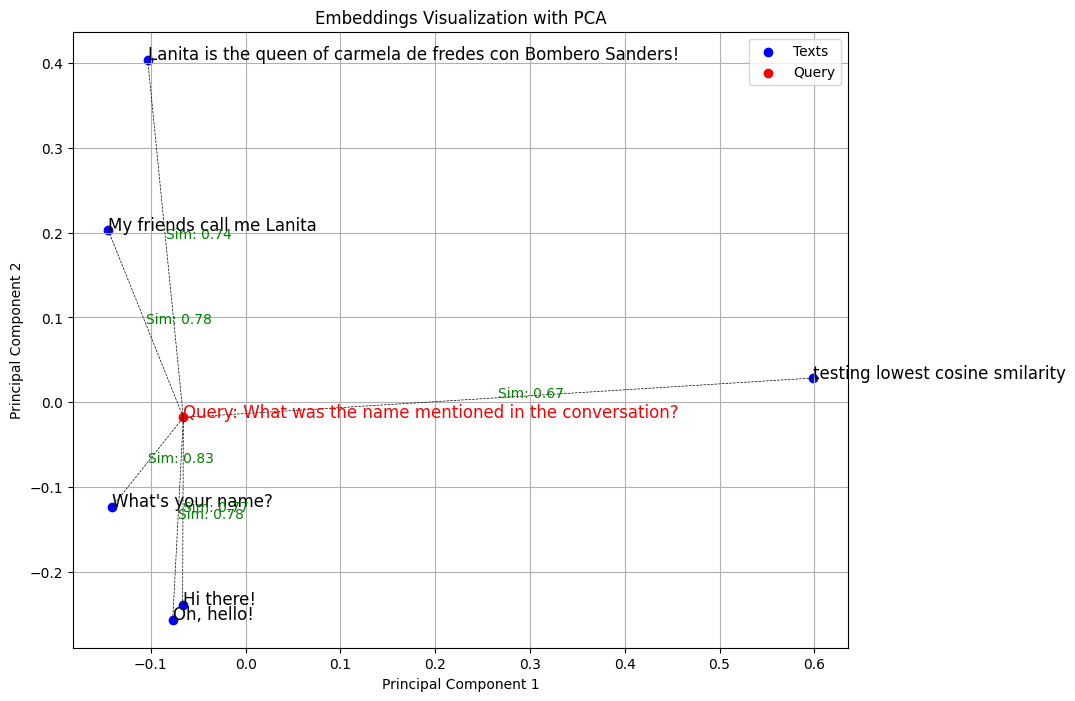

In [ ]:
# Plot the Embeddings Using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_embeddings_detailed(embeddings, embedded_query, texts, query):
    # Reduce dimensions with PCA
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(np.vstack((embeddings, embedded_query)))

    plt.figure(figsize=(10, 8))

    # Plot text embeddings
    plt.scatter(reduced_embeddings[:-1, 0], reduced_embeddings[:-1, 1], label='Texts', color='blue')
    for i, text in enumerate(texts):
        plt.annotate(text, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=12)
    
    # Plot query embedding
    plt.scatter(reduced_embeddings[-1, 0], reduced_embeddings[-1, 1], label='Query', color='red')
    plt.annotate("Query: " + query, (reduced_embeddings[-1, 0], reduced_embeddings[-1, 1]), fontsize=12, color='red')

    # Draw lines from query to each text
    for i, text in enumerate(texts):
        plt.plot([reduced_embeddings[i, 0], reduced_embeddings[-1, 0]], [reduced_embeddings[i, 1], reduced_embeddings[-1, 1]], 'k--', linewidth=0.5)
        mid_x = (reduced_embeddings[i, 0] + reduced_embeddings[-1, 0]) / 2
        mid_y = (reduced_embeddings[i, 1] + reduced_embeddings[-1, 1]) / 2
        plt.annotate(f"Sim: {similarities[i]:.2f}", (mid_x, mid_y), fontsize=10, color='green')

    plt.title("Embeddings Visualization with PCA")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot embeddings with detailed annotations
plot_embeddings_detailed(embeddings, embedded_query, texts, query)



Cosine similarity is displayed in the graph, linking the query(vector of our actual question against the vector Db) with the Plots(embeddings of our documents)

Without RAG we are going to use an prompt that mock the behavior, by passing the texts directly without an embedding process, we are simulating an RAG behaviour where the vector db retrieved the most related documents

In [ ]:
from langchain_openai import OpenAI
from langchain.prompts import PromptTemplate
from langchain_core.runnables import RunnableSequence

# Initialize the OpenAI model
llm = OpenAI()

# Define the prompt template
prompt_template = PromptTemplate.from_template("""
You are a helpful assistant. Based on the following texts and a query, provide a detailed and helpful answer.

Texts:
{texts}

Query: {query}

Answer:
""")

# Create the prompt
texts_joined = "\n".join(texts)
inputs = {"texts": texts_joined, "query": query}

# Use LangChain to generate an answer
chain = RunnableSequence(prompt_template | llm)
response = chain.invoke(inputs)

# Print the response
print(response)


The name mentioned in the conversation was Lanita.


Before seeing RAG in action, we need to understand one of its core concepts. Cosine similarity.

## Understanding Cosine Similarity

Cosine similarity is a way to measure how similar two pieces of text (or any data) are, by looking at the angle between their representations as vectors. Think of each piece of text as a point in a multi-dimensional space. The closer these points are, the more similar the texts are.

### Intuitive Definition

Imagine you have two arrows (vectors) pointing from the origin (0,0) to two points in space, one for each piece of text. Cosine similarity measures the angle between these two arrows:
- If the arrows point in the exact same direction, the cosine similarity is 1 (perfect similarity).
- If the arrows are at a 90-degree angle (perpendicular), the cosine similarity is 0 (no similarity).
- If the arrows point in completely opposite directions, the cosine similarity is -1 (completely dissimilar).

### Properties

- **Range**: Cosine similarity ranges from -1 to 1.
  - **1**: Vectors are identical.
  - **0**: Vectors are orthogonal (no similarity).
  - **-1**: Vectors are diametrically opposed.

### How it Works

To compute cosine similarity:
1. **Dot Product**: Multiply corresponding components of the vectors and sum up the results. This measures how much the vectors "point" in the same direction.
2. **Magnitude**: Calculate the length (magnitude) of each vector. This is like measuring how long each arrow is.
3. **Divide**: Divide the dot product by the product of the magnitudes. This normalizes the similarity, so it's not affected by the lengths of the vectors.

Here's how you can think about it in code:

def cosine_similarity(A, B):
    dot_product = np.dot(A, B)
    magnitude_A = np.linalg.norm(A)
    magnitude_B = np.linalg.norm(B)
    return dot_product / (magnitude_A * magnitude_B)

### Applications

Cosine similarity is widely used in various applications, including:
- Text Analysis: Comparing documents to see how similar they are.
- Information Retrieval: Ranking search results based on their relevance to a query.
- Recommender Systems: Finding similar items to recommend based on user preferences.
- Collaborative Filtering: Recommending products to users based on the preferences of similar users.
- Image Similarity: Comparing images by treating them as high-dimensional vectors.

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.schema import Document
from langchain_core.document_loaders import BaseLoader
# Define the custom text loader
class CustomTextLoader(BaseLoader):
    def __init__(self, texts):
        self.texts = texts

    def load(self):
        return [Document(page_content=text) for text in self.texts]


# Load, chunk and index the contents of the textAvs
loader = CustomTextLoader(texts)
docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=999, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
splits

[Document(page_content='Hi there!'),
 Document(page_content='Oh, hello!'),
 Document(page_content="What's your name?"),
 Document(page_content='My friends call me Lanita'),
 Document(page_content='Lanita is the queen of carmela de fredes con Bombero Sanders!'),
 Document(page_content='testing lowest cosine smilarity')]

In [ ]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain import hub


vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings())
# Retrieve and generate using the relevant snippets of the texts
retriever = vectorstore.as_retriever()
prompt = hub.pull("rlm/rag-prompt")
query = "is lanita mentioned in the documents? aand what is she called, is she a queen?"

llm = OpenAI()

def format_docs(docs):
   return "\n\n".join(doc.page_content for doc in docs)

rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

for chunk in rag_chain.stream(query):
   print(chunk, end="", flush=True)

 Yes, Lanita is mentioned in the documents as the queen of carmela de fredes con Bombero Sanders. She is also referred to as Lanita by her friends.

## Conclusion: Linking Cosine Similarity and Retrieval-Augmented Generation (RAG)

### Understanding Cosine Similarity

At the beginning of this notebook, we explored the concept of cosine similarity and its role in determining the semantic similarity between vectors. We used embeddings to represent both the texts and the query in a high-dimensional space, and cosine similarity helped us measure how closely related these vectors are.

### Practical Implications of Cosine Similarity

Cosine similarity is a crucial metric in information retrieval. By calculating the cosine similarity between the query and each text, we can identify which texts are most relevant to the query. This relevance scoring is essential for the retrieval step in RAG, as it ensures that the most contextually appropriate texts are selected to inform the generation process.

### Retrieval-Augmented Generation (RAG)

Retrieval-Augmented Generation (RAG) is a powerful approach that enhances the capabilities of language models like GPT-4 by combining retrieval mechanisms with generation capabilities. Here’s a summary of how RAG works and its advantages:

1. **Retrieval Step**:
   - **Document Retrieval**: In the retrieval step, we use cosine similarity to rank and select the most relevant documents or text snippets from a corpus based on their similarity to the query.
   - **Custom Retriever**: We implemented a custom retriever that loaded predefined texts, chunked them, and indexed them using embeddings. This retriever utilized cosine similarity to fetch the most relevant texts.

2. **Generation Step**:
   - **Contextual Generation**: The retrieved texts are then provided as context to a language model (GPT-4 in this case), which generates a coherent and contextually appropriate response.
   - **Prompt Design**: A carefully designed prompt ensures that the language model uses the provided context effectively to answer the query.

### Example: Task Decomposition Query

In our example, we demonstrated the entire RAG pipeline with a query about "Lanita". By combining cosine similarity for retrieval and GPT-4 for generation, we generated a response that was informed by the most relevant snippets of text.

### Benefits of RAG

- **Enhanced Accuracy**: By retrieving and providing relevant context, RAG significantly improves the accuracy of the generated responses.
- **Contextual Relevance**: RAG ensures that the generated answers are not only accurate but also contextually relevant, as they are based on actual retrieved documents.

### Final Thoughts

This notebook has provided a comprehensive overview of how cosine similarity and Retrieval-Augmented Generation (RAG) work together to enhance the capabilities of language models. By understanding these concepts and their practical applications, you can leverage them to build more powerful and accurate information retrieval and generation systems.

### Summary of Key Points

- **Cosine Similarity**: Measures the semantic similarity between vectors and is used to rank relevance.
- **Embeddings**: Represent texts and queries in a high-dimensional space.
- **RAG Pipeline**: Combines retrieval (using cosine similarity) and generation (using GPT-4) to produce accurate and contextually relevant responses.
- **Practical Implementation**: Demonstrated with predefined texts and a custom retriever.

By mastering these techniques, you can significantly enhance the performance of your language models and build sophisticated retrieval-augmented applications.
